## Sarima

In [3]:
# Import packages
import plotly.express as px
import pandas as pd

# Read in the data
data = pd.read_csv('AirPassengers.csv')
data['Month'] = pd.to_datetime(data['Month'])


def plot_passenger_volumes(df: pd.DataFrame,
                           y: str) -> None:
    """General function to plot the passenger data."""

    fig = px.line(df, x='Month', y=y, labels={'Month': 'Date'})
    fig.update_layout(template="simple_white", font=dict(size=18), title_text='Airline Passengers',
                      width=650, title_x=0.5, height=400)

    return fig.show()


# Plot the airline passenger data
plot_passenger_volumes(df=data, y='#Passengers')

In [4]:
# Import packages
from scipy.stats import boxcox

# Make the data stationary
data['Passengers_Boxcox'], lam = boxcox(data['#Passengers'])
data["Passenger_diff"] = data["Passengers_Boxcox"].diff()
data.dropna(inplace=True)

# Plot the stationary passenger data
plot_passenger_volumes(df=data, y='Passenger_diff')

## Modelling

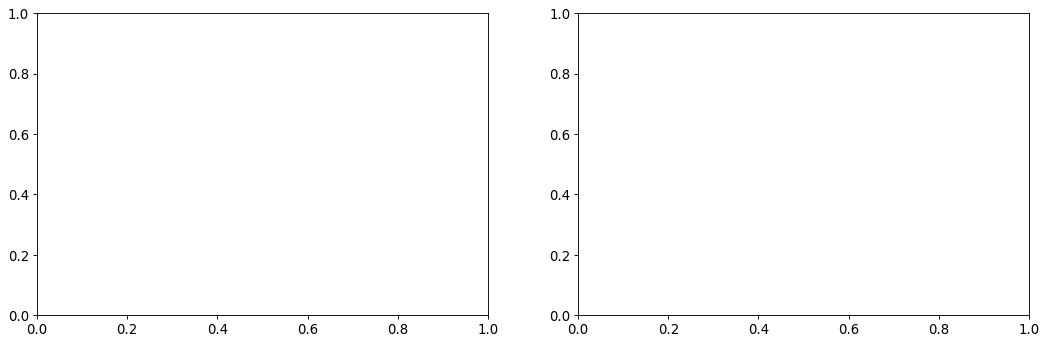

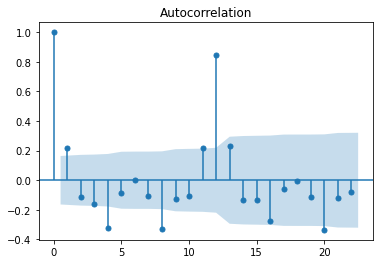

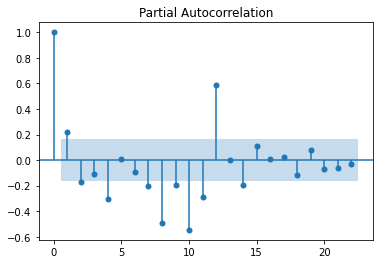

In [5]:
# Import packages
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

# Plot acf and pacf
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5), dpi=80)
plot_acf(data['Passenger_diff'])
plot_pacf(data['Passenger_diff'], method='ywm')
ax1.tick_params(axis='both', labelsize=12)
ax2.tick_params(axis='both', labelsize=12)
plt.show()

In [6]:
# Import packages
from scipy.special import inv_boxcox
from statsmodels.tsa.arima.model import ARIMA

# Split train and test
train = data.iloc[:-int(len(data) * 0.2)]
test = data.iloc[-int(len(data) * 0.2):]

# Build ARIMA model
model = ARIMA(train['Passengers_Boxcox'], order=(10, 1, 10),
              seasonal_order=(1, 1, 1, 12)).fit()
boxcox_forecasts = model.forecast(len(test))
forecasts = inv_boxcox(boxcox_forecasts, lam)

c:\Users\heito\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

c:\Users\heito\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

c:\Users\heito\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

c:\Users\heito\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

c:\Users\heito\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\heito\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning:

No supported index is availabl

## Results

In [7]:
# Import packages
import plotly.graph_objects as go

def plot_forecasts(forecasts: list[float], title: str) -> None:
    """Function to plot the forecasts."""
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=train['Month'], y=train['#Passengers'], name='Train'))
    fig.add_trace(go.Scatter(x=test['Month'], y=test['#Passengers'], name='Test'))
    fig.add_trace(go.Scatter(x=test['Month'], y=forecasts, name='Forecast'))
    fig.update_layout(template="simple_white", font=dict(size=18), title_text=title,
                      width=650, title_x=0.5, height=400, xaxis_title='Date',
                      yaxis_title='Passengers')

    return fig.show()


# Plot the forecasts
plot_forecasts(forecasts, 'SARIMA')